In [1]:
import numpy as np
import requests
from bs4 import BeautifulSoup
from IPython.display import Markdown, display,IFrame,HTML,Image
from sympy import divisors,divisor_count,factorint
import time
import itertools
from functools import reduce

### Getting from a to b
We’re making a tower! 
 Initially, nobody thought out the huge energy needed. Even quite useful approaches looked suspect, adding tons of thought heretofore even beginning. 
 There have been some negatives along the way, but also some positives. But we’ve powered through it, one way or another, and things are looking up. 
 As you can see, rows 1 through 7 have already been built. (And we’ve got the next 9 figured out as well.) 
 However… I found this one piece near the bottom of the bag, I’m having trouble figuring out where it will go. Can you determine the first (lowest) row where it would make sense to place it?

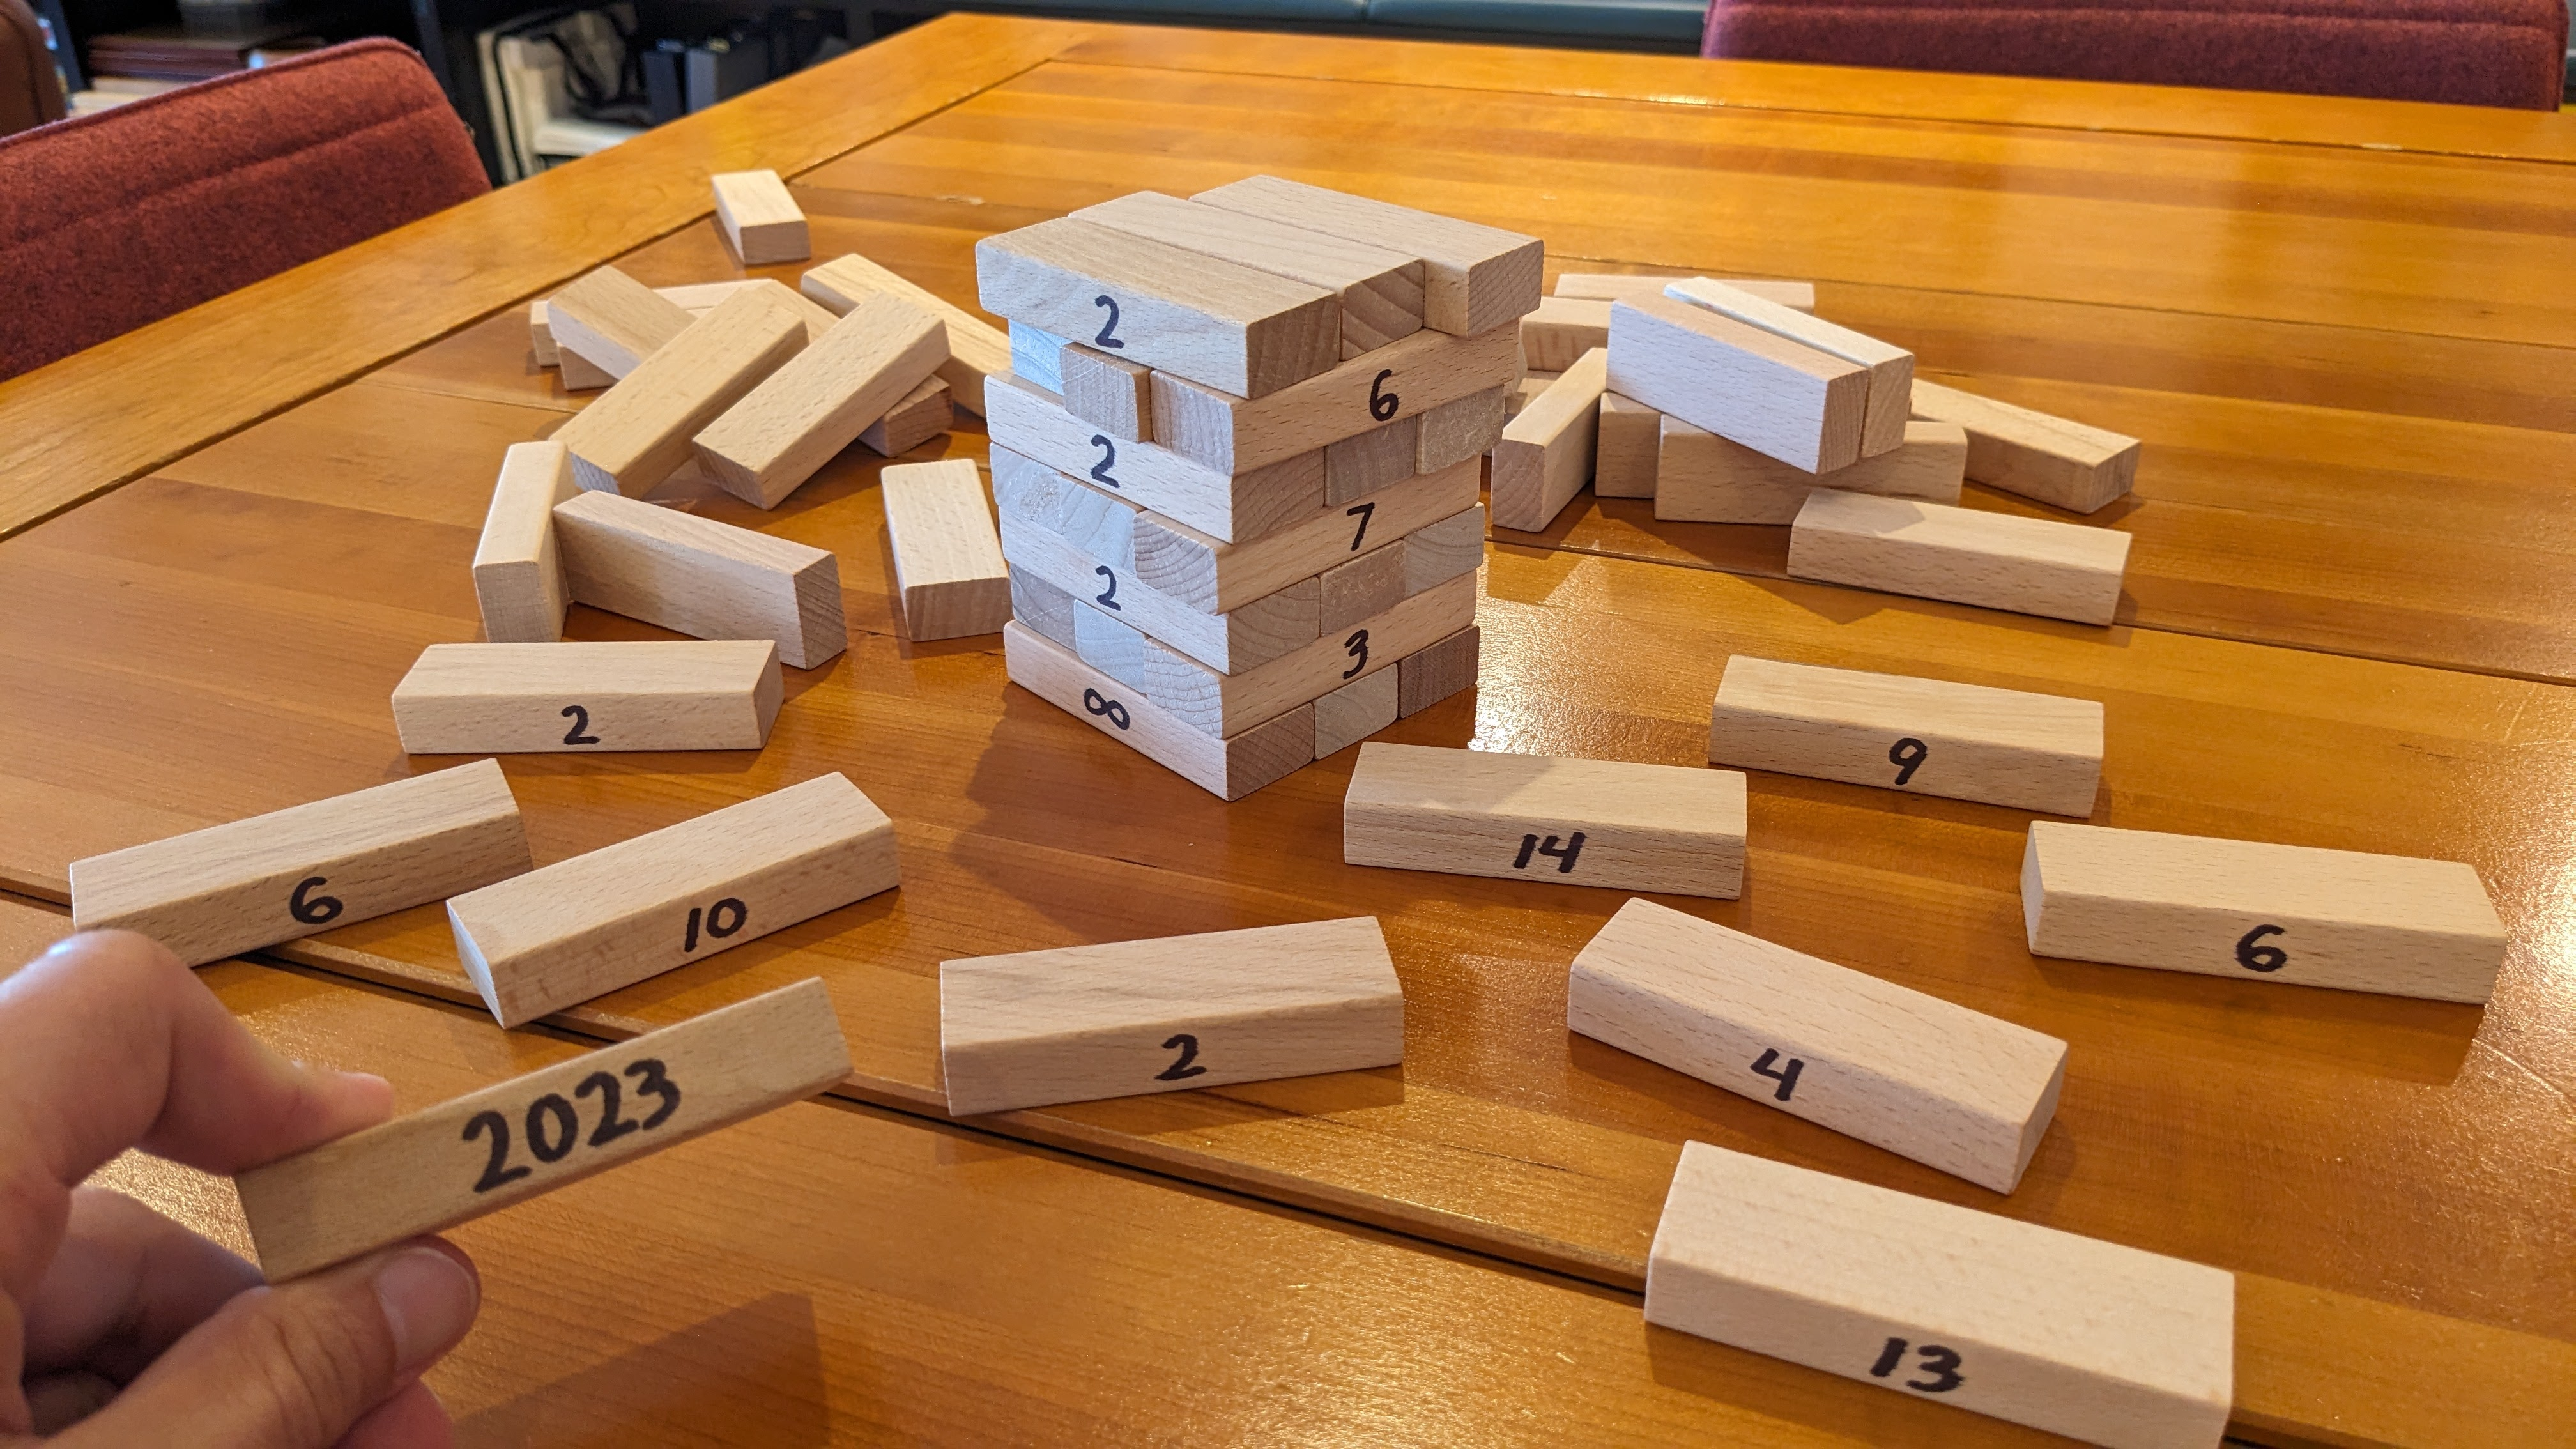

In [2]:
url='https://www.janestreet.com/puzzles/getting-from-a-to-b-index/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
y =[text for text in soup.body.stripped_strings]
#display([(i,j) for i,j in enumerate(y)])
display(Markdown("### "+y[8]+"\n"+" \n ".join(y[11:16])))
display(Image('https://www.janestreet.com/puzzles/20230905_a_to_b.jpg',width=600))

In [3]:
# Hint n to the n = a to the b
["".join([i[0] for i in x.split()]).lower() for x in y[12].replace(".",",").split(",")[1:4]]

['ntothen', 'equals', 'atotheb']

In [4]:
# After some exploration the answer is the number of ways n^n can be represented as a^b
# Took a while to work out how to do this and a fair bit of trial and error 
# rather than maths. Not 100% sure why this works but it does. Was hoping for
# more from the answer. 

# Using the fact that if n factors to i^x*j^y then n^n factors to i^nx*j^ny
# pull out the common factors in the divisors of the exponents of the prime factors of n^n to
# determine the b with the most divisors
# there are 2 ways of writing the exponent for every even one and one for every odd one

def answer(n):
    test_list = [divisors(v*n) for k,v in factorint(n).items()]
    res = list(reduce(lambda i, j: i & j, (set(x) for x in test_list)))
    return sum([1 if i % 2==1 else 2 for i in res])

[answer(i) for i in range(2,17)]

[3, 2, 7, 2, 6, 2, 14, 9, 6, 2, 10, 2, 6, 4, 13]

In [5]:
# dont get to the answer from a brute force search. Gets slow v. quickly
start = time.time()
stop = True
biggest = 0
i = 2
while stop:
    i += 1
    x = answer(i)
    if x >biggest:
        biggest = x
        print(i,x,factorint(i))
    if i == 200000:
        print("Took {:.4f} seconds".format(time.time()-start))
        stop=False

3 2 {3: 1}
4 7 {2: 2}
8 14 {2: 3}
32 22 {2: 5}
64 30 {2: 6}
144 33 {2: 4, 3: 2}
216 35 {2: 3, 3: 3}
240 36 {2: 4, 3: 1, 5: 1}
360 42 {2: 3, 3: 2, 5: 1}
480 44 {2: 5, 3: 1, 5: 1}
512 57 {2: 9}
900 63 {2: 2, 3: 2, 5: 2}
1296 65 {2: 4, 3: 4}
1440 66 {2: 5, 3: 2, 5: 1}
1680 72 {2: 4, 3: 1, 5: 1, 7: 1}
2520 84 {2: 3, 3: 2, 5: 1, 7: 1}
3360 88 {2: 5, 3: 1, 5: 1, 7: 1}
3600 99 {2: 4, 3: 2, 5: 2}
5040 108 {2: 4, 3: 2, 5: 1, 7: 1}
7560 112 {2: 3, 3: 3, 5: 1, 7: 1}
7776 132 {2: 5, 3: 5}
14400 135 {2: 6, 3: 2, 5: 2}
15120 144 {2: 4, 3: 3, 5: 1, 7: 1}
20160 156 {2: 6, 3: 2, 5: 1, 7: 1}
25200 162 {2: 4, 3: 2, 5: 2, 7: 1}
27720 168 {2: 3, 3: 2, 5: 1, 7: 1, 11: 1}
30240 176 {2: 5, 3: 3, 5: 1, 7: 1}
40320 180 {2: 7, 3: 2, 5: 1, 7: 1}
44100 189 {2: 2, 3: 2, 5: 2, 7: 2}
50400 198 {2: 5, 3: 2, 5: 2, 7: 1}
55440 216 {2: 4, 3: 2, 5: 1, 7: 1, 11: 1}
83160 224 {2: 3, 3: 3, 5: 1, 7: 1, 11: 1}
100800 234 {2: 6, 3: 2, 5: 2, 7: 1}
110880 264 {2: 5, 3: 2, 5: 1, 7: 1, 11: 1}
166320 288 {2: 4, 3: 3, 5: 1, 7: 1, 11:

In [6]:
# assume that you need a number which has high powers of low numbers 
# take the smallest value. Including a few larger primes didn't help

start = time.time()
answers =[]

for a,b,c,d in itertools.product(range(0,17),repeat=4):
    n = 2**d * 3**c * 5**b * 7**a
    if n > 1 and (len(answers)==0 or n < min(answers)):
        x=answer(n)
        if x == 2023:
            answers += [n]
m = min(answers)
print("{:,} can be represented {} ways. {}".format(m,answer(m),factorint(m)))
print("Took {:.4f} seconds".format(time.time()-start))

26,273,633,422,851,562,500 can be represented 2023 ways. {2: 2, 3: 16, 5: 16}
Took 152.5851 seconds


### Getting from a to b
OK, so it took a little longer than expected, and we even had to go find a step stool, but as you can see (above) we eventually finished the tower :-) 
 Astute puzzlers noted that the sentence that began “Initially, “, and which then proceeded to sound like chatbot slurry, was itself a major clue. The 
 initial 
 letters from the words that followed spell out “ 
 n 
 to the 
 n 
 equals 
 a 
 to the 
 b 
 ”. 
 And so: the 
 n 
 th 
 level of the tower displays the number of ways to rewrite 
 n 
 n 
 in the form 
 a 
 b 
 , where 
 a 
 and 
 b 
 can be positive or negative integers. (As alluded to in the third paragraph.) 
 The least integer 
 n 
 for which 
 n 
 n 
 permits exactly 2023 such re-writings is 2 
 2 
 × 3 
 16 
 × 5 
 16 
 = 
 26,273,633,422,851,562,500 
 . 
 The casework involved in solving for the least such 
 n 
 is fairly interesting; we’d love to share it but we’ve just been told we need to disassemble the tower 
 tout suite 
 to clear away table space for the research team’s daily game of 
 Campaign for North Africa 
 . Gotta go!

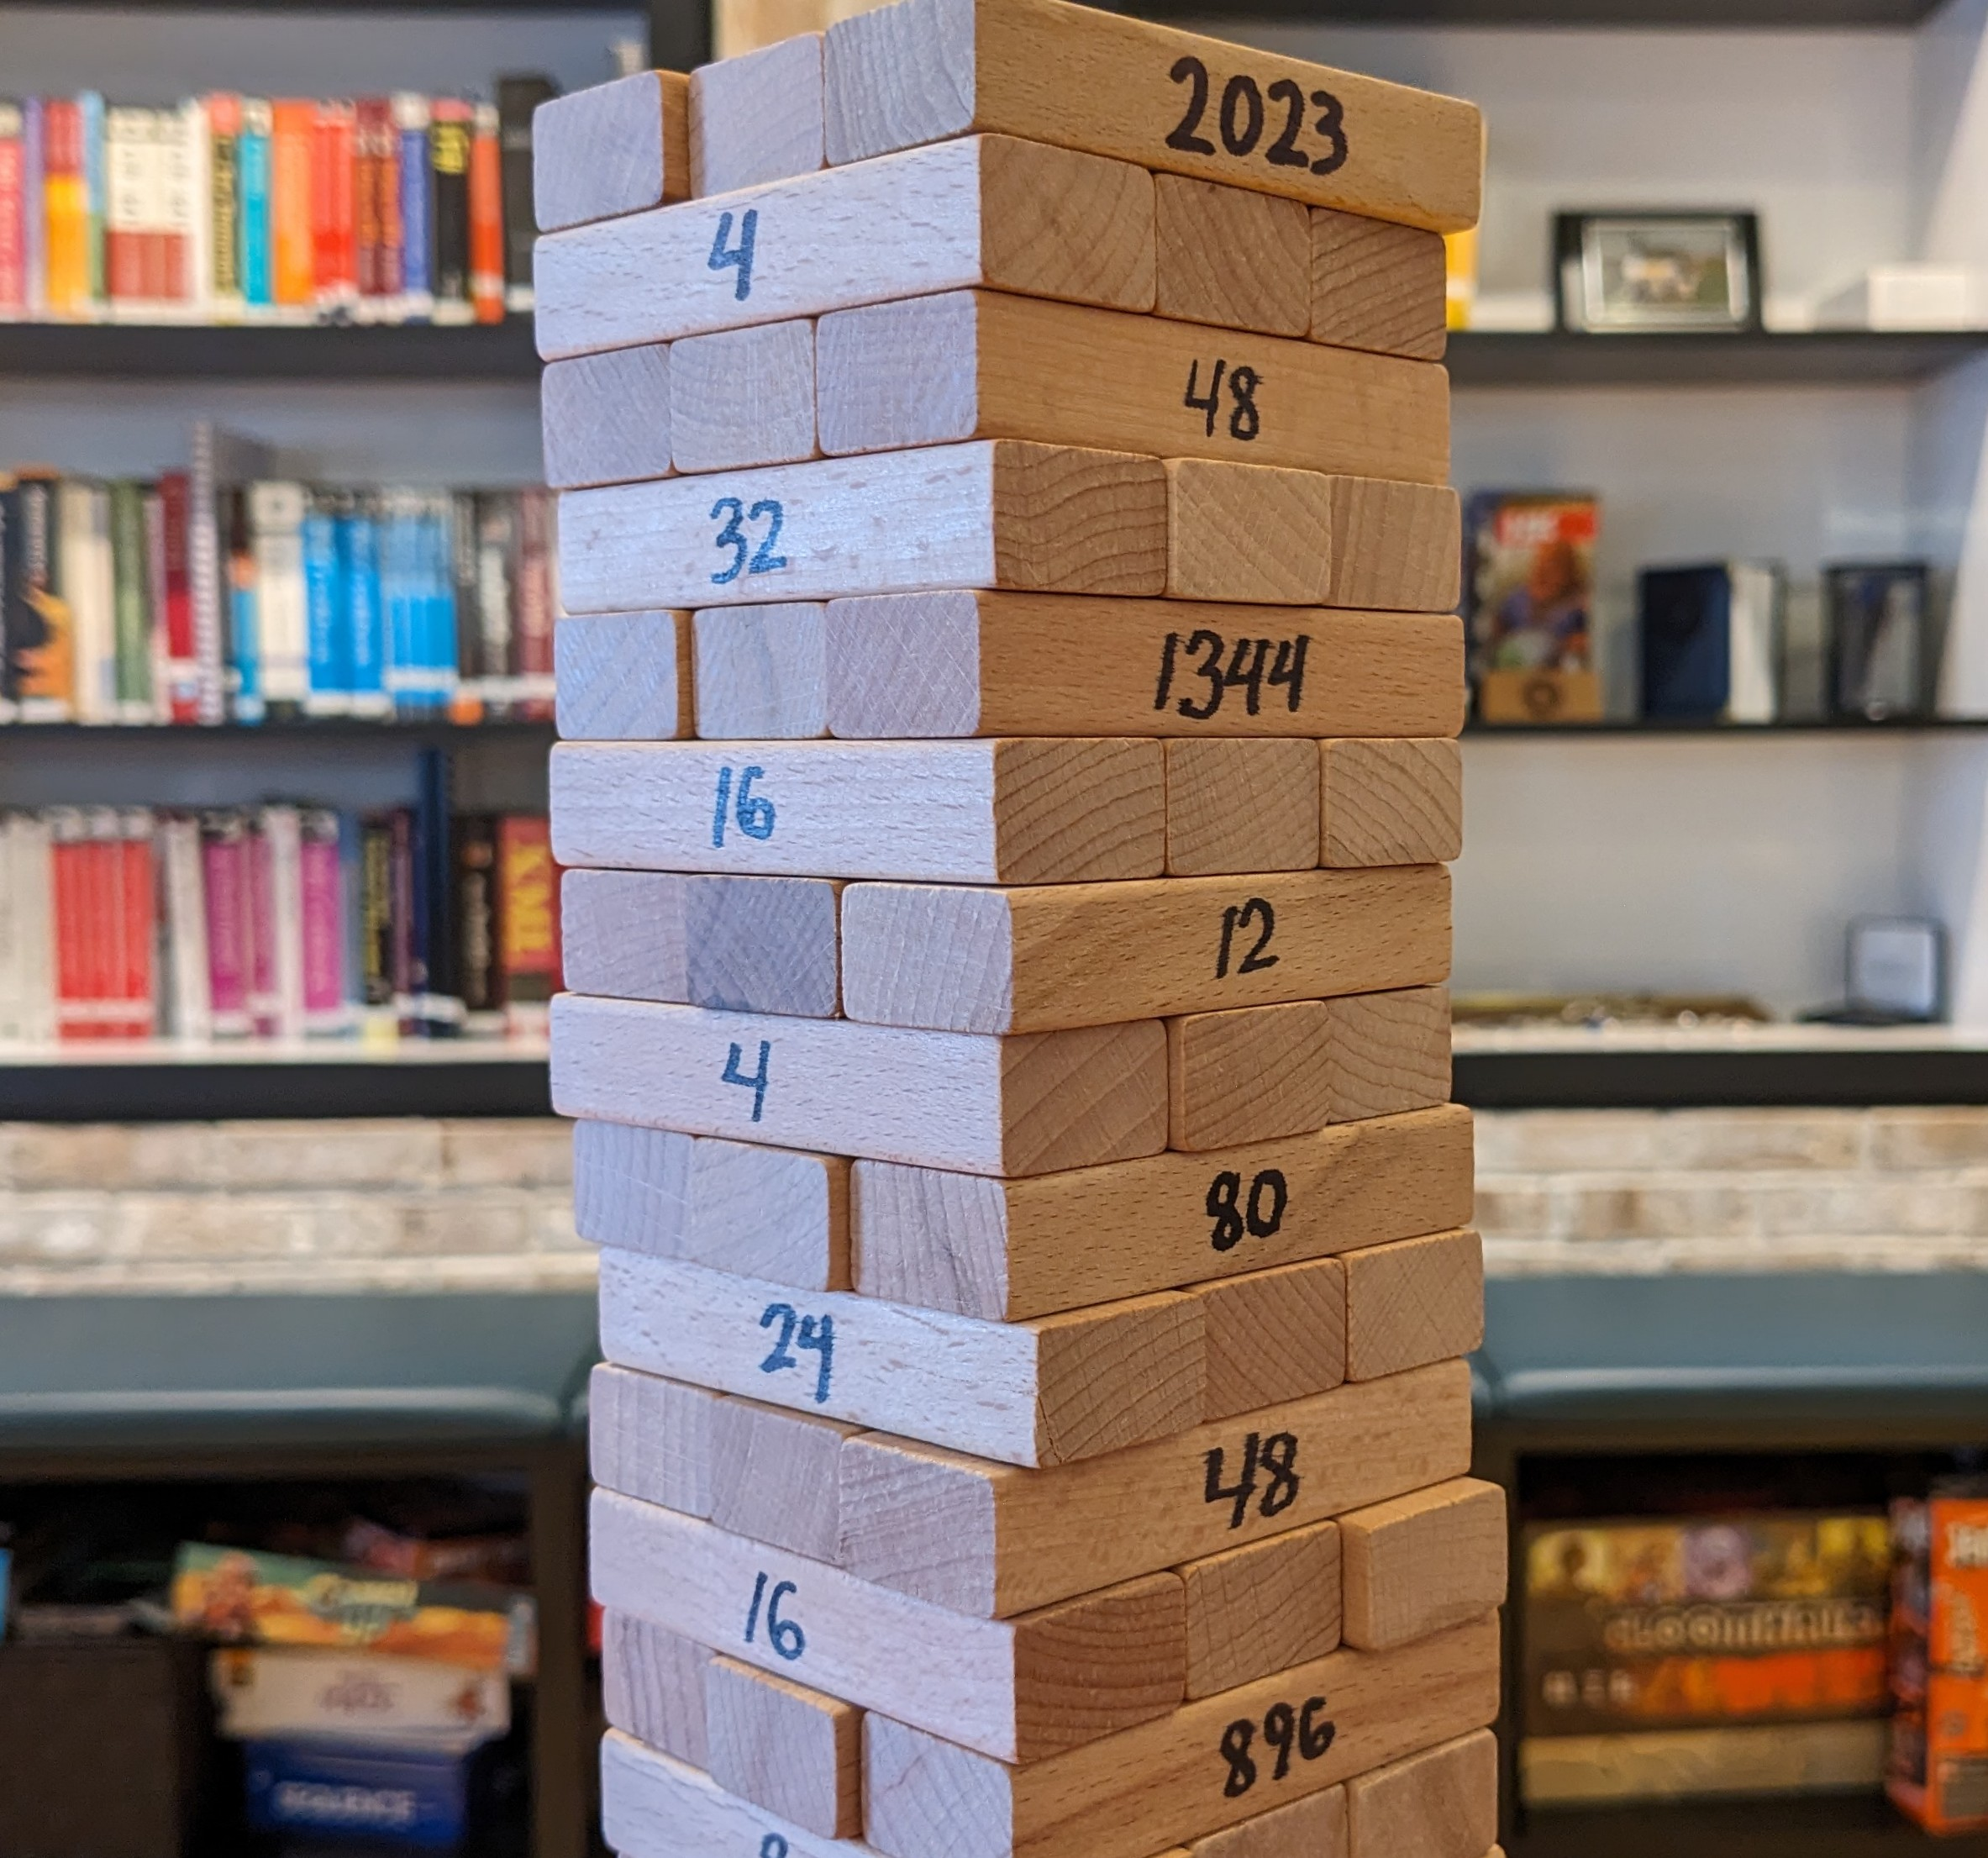

In [7]:
url='https://www.janestreet.com/puzzles/getting-from-a-to-b-solution/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
y =[text for text in soup.body.stripped_strings]
#display([(i,j) for i,j in enumerate(y)])
display(Markdown("### "+y[8]+"\n"+" \n ".join(y[11:58])))
display(Image('https://www.janestreet.com/puzzles/getting-from-a-to-b-solution.jpg',width=600))

In [8]:
for i in range(14):
    print(answer(m-i))

2023
4
48
32
1344
16
12
4
80
24
48
16
896
8
